In [91]:
import pandas as pd
import numpy as np

Importing the dataset

In [92]:
df = pd.read_csv("train.csv")

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.shape

(891, 12)

In [95]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Shanu

In [96]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [97]:
df['Cabin_new'] = np.where((df['Cabin'].isnull()),1,0)

In [98]:
df['Cabin_new'].value_counts()

1    687
0    204
Name: Cabin_new, dtype: int64

In [99]:
df['Cabin_new'].mean()

0.7710437710437711

In [100]:
df.shape

(891, 13)

In [101]:
perc = (df['Cabin'].isnull().sum())/(df.shape[0])
perc

0.7710437710437711

In [102]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [103]:
(df.loc[(df['Survived'] == 1)].shape[0])/df.shape[0]

0.3838383838383838

In [104]:
df.loc[(df['Survived'] == 0)].shape[0]

549

In [105]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_new'],
      dtype='object')

In [106]:
df[['Survived', 'Cabin_new']].mean()

Survived     0.383838
Cabin_new    0.771044
dtype: float64

In [111]:
df.groupby(['Survived'])['Cabin_new'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_new, dtype: float64

3. Missing At Random(MAR)
  
        # Men -- Hide their salary  
        # Women -- Hide their age

All the techniques of handling missing values
1. Mean / Meadian / Mode Imputation 
2. Random Simple Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation      

# 1. Mean / Median / Mode Imputation ----- 
    - Mean / Median Imputation has an assumption that data are missing at completely    random(MCAR)
    - We solve this by replacing NAN values with most frequent occurances of the variables.
   

In [113]:
df = pd.read_csv('train.csv', usecols= ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [117]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [119]:
# To find how many percentage of values in df is missing
# We find that 'Age' has most missing values i.e. 19%
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [143]:
df.Age.median()

28.0

In [144]:
# Here we are imputing NAN values with Median
from statistics import median

def impute_median(df, feature_name, median):
    df['Age_imputed'] = df['Age'].fillna(median)

median = df.Age.median()

impute_median(df, 'Age', median)

In [146]:
df.head()

,Survived,Age,Fare,Age_imputed
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [149]:
print(df['Age'].mean())
print(df['Age_imputed'].mean())

29.69911764705882
29.36158249158249


In [150]:
print(df['Age'].std())
print(df['Age_imputed'].std())

14.526497332334042
13.019696550973201


In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

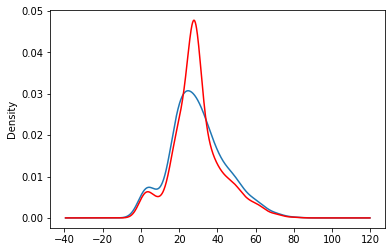

In [171]:
from turtle import color
import seaborn as sns

# fig = plt.figure()
# ax = fig.add_subplots(1,1)
# plt.plot(df['Age'], kind= 'kde', color= 'blue', ax=ax)
# plt.plot(df['Age_imputed'], kind= 'kde', color= 'red', ax=ax)
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_imputed.plot(kind='kde', ax=ax, color='red')

Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
####Easy to implement(Robust to outliers)
####Faster way to obtain the complete dataset 
#### Disadvantages
####Change or Distortion in the original variance
####Impacts Correlation